In [1]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from pursuit import PursuitEnv
from stable_baselines3.common.callbacks import CheckpointCallback
import os
import cv2
LOAD_PATH = r"C:\Users\cherniak\pet_projects\Self-driving-RL-car\logs\train_to_reach target\default_SB_2\checkpoints\rl_model_345600000_steps.zip"

obs_storage = []

if True:
    env = make_vec_env(lambda: PursuitEnv(render=True), n_envs=1)
    model = PPO.load(LOAD_PATH, env=env, device="cpu")
    vec_env = model.get_env()
    obs = vec_env.reset()
    while True:
        obs_storage.append(obs)
        action, _states = model.predict(obs, deterministic=True)
        obs, rewards, dones, info = vec_env.step(action)
        if dones[0]:
            break
cv2.destroyAllWindows()

In [2]:
obs

OrderedDict([('acceleration', array([[0.]], dtype=float32)),
             ('orientation', array([[0.]], dtype=float32)),
             ('steering', array([[0.]], dtype=float32)),
             ('tgt_x', array([[2.975346]], dtype=float32)),
             ('tgt_y', array([[9.636627]], dtype=float32)),
             ('velocity', array([[0.]], dtype=float32)),
             ('x', array([[50.]], dtype=float32)),
             ('y', array([[50.]], dtype=float32))])

In [3]:
acc = [o["acceleration"].item() for o in obs_storage]
vel = [o["velocity"].item() for o in obs_storage]
orient = [o["orientation"].item() for o in obs_storage]
steer = [o["steering"].item() for o in obs_storage]
x = [o["x"].item() for o in obs_storage]
y = [o["y"].item() for o in obs_storage]
tgt_x = obs_storage[0]["tgt_x"].item()
tgt_y = obs_storage[0]["tgt_y"].item()

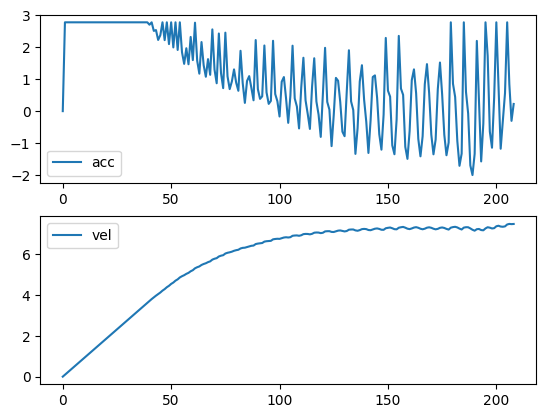

In [4]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(2,1)
ax[0].plot(acc, label="acc")
ax[0].legend()
ax[1].plot(vel, label="vel")
ax[1].legend()

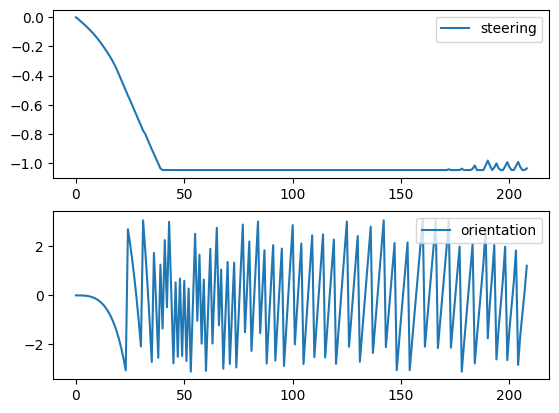

In [5]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(2,1)
ax[0].plot(steer, label='steering')
ax[0].legend()
ax[1].plot(orient, label="orientation")
ax[1].legend()

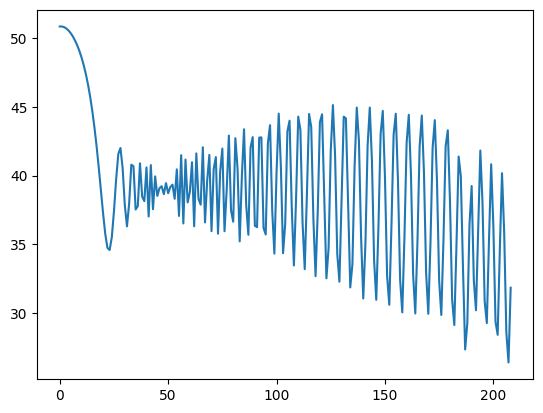

In [6]:
import scipy.spatial.distance as distance

dist = [distance.euclidean((x_, y_), (tgt_x, tgt_y)) for x_, y_ in zip(x, y)]

plt.plot(dist)